# Datasets and variables using numpy, matplotlib and pandas

## Introduction to numpy

Full documentation is available [here](https://numpy.org/) and introduction tutorials are available [here](https://numpy.org/learn/).

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by **a tuple of non-negative integers**. In NumPy dimensions are called **axes**.

### Arrays

In [21]:
import numpy as np

In [19]:
one_dimensional = np.array([1, 2, 3])
two_dimensional = np.array([[1, 2, 3], [4, 5, 6]])

Axes can be accessed by their index:

In [22]:
# Row access
print(two_dimensional[1,:])

# Column access
print(two_dimensional[:,1])

[4 5 6]
[2 5]


#### Exercise:
Write a function that returns the value at index `row_ix` for the row and `col_ix` for the column.


In [41]:
def array_indexer(input_array, row_ix, col_ix):
    """Returns the value at row_ix and col_ix for input_array.
    """

### Masking
Masking allows to select only values from an array according to an array of booleans.

In [45]:
# Compare array values to a set value
mask = two_dimensional > 2
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [47]:
# Get values of the array respecting this mask
two_dimensional[mask]

array([3, 4, 5, 6])

## Computing statistical indicators
Numpy comes with lots of functions to compute statistical indicators, either overall the values, or overcolumns and rows.

In [30]:
# Over columns
print(np.mean(two_dimensional, axis=1))

# Over rows
print(np.mean(two_dimensional, axis=0))

# Overall
print(np.mean(two_dimensional))

[2. 5.]
[2.5 3.5 4.5]
3.5


### Exercices: 
Compute the standard error and the median for each row/column of the array `two_dimensional`.

## Plotting using matplotlib
> Add the matplotlib library to your virtual environment `pip install matplotlib`

Matplotlib is a module for generating 2D and 3D graphics. Documentation is available [here](https://matplotlib.org/api/pyplot_summary.html). A set of tutorials are available [here](https://matplotlib.org/stable/tutorials/index.html).

Matplotlib is both **complex** and **very powerful**, so it may take a while for you to learn its full power.

In [34]:
# Generate a random vector for plotting
random_vector = np.random.normal(0, 10, 1000)

### Plotting an histogram

In [38]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Histogram of a random vector')

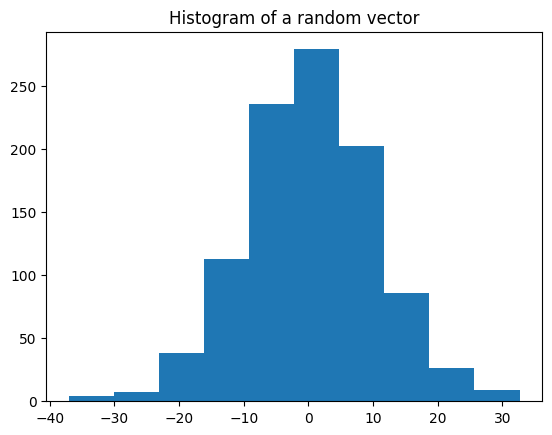

In [40]:
plt.hist(x=random_vector)
plt.title("Histogram of a random vector")

#### Exercice:
Add the labels for the x axis and the y axis on the above plot.

### Plotting a boxplot

Text(0.5, 1.0, 'Boxplot of a random vector')

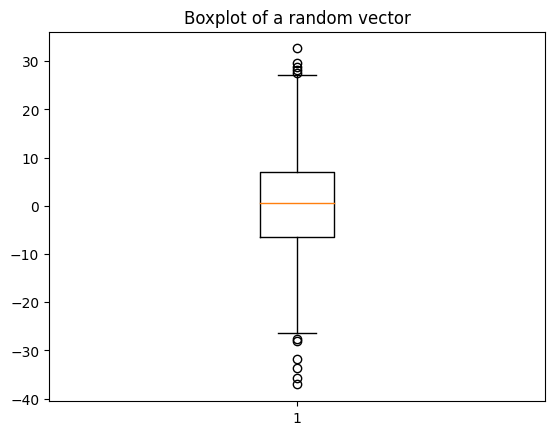

In [48]:
plt.boxplot(x=random_vector)
plt.title("Boxplot of a random vector")

#### Exercice:
Using the same data vector, plot a [violin plot] and play with the different options (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).

### Scatter plots
To plot the repartition of two numerical variables, **scatter plots** can be used.

In [49]:
random_vector_1 = np.random.normal(0, 10, 1000)
random_vector_2 = np.random.normal(0, 10, 1000)

Text(0, 0.5, 'Vector 2')

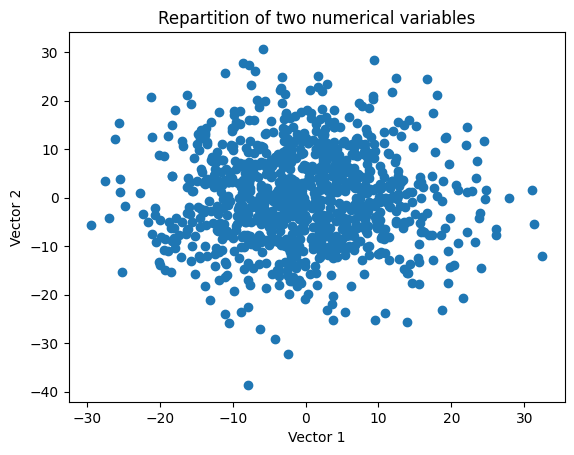

In [53]:
plt.scatter(random_vector_1, random_vector_2)
plt.title("Repartition of two numerical variables")
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")

## Introduction to pandas

Pandas is a very easy to use library for data manipulation (but it can be tricky, because it's so easy to use you'll only rely on pandas afterwards even though it's **slower**).
Full documentation of pandas is [here](https://pandas.pydata.org/) and introduction is [here](https://pandas.pydata.org/docs/user_guide/10min.html).

### Dataframes
Dataframes (and Series, their one dimensional counterparts) is the pandas class that holds multi-dimensional data.

In [61]:
import pandas as pd

df = pd.DataFrame([random_vector_1, random_vector_2], columns=['col_' + str(i) for i in range(1000)])

In [62]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_990,col_991,col_992,col_993,col_994,col_995,col_996,col_997,col_998,col_999
0,4.184257,10.194608,-7.751728,-13.757635,10.880547,1.990866,5.517750,-7.478442,5.967522,10.502741,...,1.682014,7.393530,2.483149,6.035907,8.741949,-3.070633,-0.772335,6.948730,9.429496,-2.541678
1,-4.831069,-0.963038,3.094039,13.336654,-11.325944,4.240541,-7.509878,23.215138,16.631844,5.275358,...,-4.387971,4.285775,-3.963431,-7.733111,5.773628,14.419666,-8.425689,2.785601,28.397904,14.051731


In [59]:
type(df)

pandas.core.frame.DataFrame

Dataframes can be indexed by its location or by its index.

In [69]:
# By column name
df["col_0"]

# By index of column
df.iloc[:,0]

0    4.184257
1   -4.831069
Name: col_0, dtype: float64

The numpy array can be accessed using the `values` attribute (**it will be important for further labs and for matplotlib**).

In [71]:
df.values

array([[ 4.18425652, 10.19460771, -7.75172817, ...,  6.94873027,
         9.42949648, -2.5416776 ],
       [-4.83106903, -0.96303831,  3.09403865, ...,  2.7856011 ,
        28.39790406, 14.05173105]])

### Computing statistical indicators

A generic describes method is available to compute at once all the statistical estimators on a dataset.

In [72]:
df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_990,col_991,col_992,col_993,col_994,col_995,col_996,col_997,col_998,col_999
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,-0.323406,4.615785,-2.328845,-0.210490,-0.222699,3.115704,-0.996064,7.868348,11.299683,7.889050,...,-1.352978,5.839653,-0.740141,-0.848602,7.257789,5.674516,-4.599012,4.867166,18.913700,5.755027
std,6.374798,7.889647,7.669115,19.158556,15.702361,1.590760,9.211924,21.703638,7.540814,3.696318,...,4.292127,2.197515,4.558420,9.736166,2.098920,12.367509,5.411738,2.943777,13.412690,11.733312
min,-4.831069,-0.963038,-7.751728,-13.757635,-11.325944,1.990866,-7.509878,-7.478442,5.967522,5.275358,...,-4.387971,4.285775,-3.963431,-7.733111,5.773628,-3.070633,-8.425689,2.785601,9.429496,-2.541678
25%,-2.577238,1.826373,-5.040286,-6.984063,-5.774321,2.553285,-4.252971,0.194953,8.633602,6.582204,...,-2.870474,5.062714,-2.351786,-4.290856,6.515708,1.301942,-6.512350,3.826383,14.171598,1.606675
50%,-0.323406,4.615785,-2.328845,-0.210490,-0.222699,3.115704,-0.996064,7.868348,11.299683,7.889050,...,-1.352978,5.839653,-0.740141,-0.848602,7.257789,5.674516,-4.599012,4.867166,18.913700,5.755027
75%,1.930425,7.405196,0.382597,6.563082,5.328924,3.678122,2.260843,15.541743,13.965763,9.195895,...,0.164518,6.616591,0.871504,2.593653,7.999869,10.047091,-2.685674,5.907948,23.655802,9.903379
max,4.184257,10.194608,3.094039,13.336654,10.880547,4.240541,5.517750,23.215138,16.631844,10.502741,...,1.682014,7.393530,2.483149,6.035907,8.741949,14.419666,-0.772335,6.948730,28.397904,14.051731


#### Exercice:
Compute all the estimators available using pandas `describe` method with `numpy`.